In [1]:
import csv
import pandas as pd
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")
    exampleReader = csv.reader(exampleFile)
    exampleData = list(exampleReader)
    exampleFile.close()
    return exampleData

# use process_csv to pull out the header and data rows
csv_rows = process_csv("dataset/all_water_mains_with_breaksinfo.csv")
csv_header = csv_rows[0]
csv_data = csv_rows[1:]

In [2]:
csv_header

['',
 'FacilityID',
 'InstallYea',
 'LifecycleS',
 'Diameter',
 'Material',
 'Bagged',
 'LiningType',
 'break_date',
 'season',
 'pipe_size',
 'pipe_depth_ft',
 'pipe_type',
 'soil_type',
 'frost_depth_in',
 'X',
 'Y',
 'time_at_scene',
 'time_on',
 'time_off',
 'TotalHoursWaterOff',
 'street_dir',
 'street_name',
 'street_type',
 'StreetSegmentID',
 'num_bldgs_off']

In [3]:
df=pd.read_csv("dataset/all_water_mains_with_breaksinfo.csv")

In [4]:
df


,Unnamed: 0,FacilityID,InstallYea,LifecycleS,Diameter,Material,Bagged,LiningType,break_date,season,...,Y,time_at_scene,time_on,time_off,TotalHoursWaterOff,street_dir,street_name,street_type,StreetSegmentID,num_bldgs_off
0,0,MAIN-4869-1,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
1,1,MAIN-4869-2,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
2,2,MAIN-4969-3,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
3,3,MAIN-4969-4,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
4,4,MAIN-4969-5,1981,ACT,16.0,DI,0,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23876,23876,MAIN-1448-25169,2020,ACT,8.0,DI,1,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
23877,23877,MAIN-1447-25170,2020,ACT,8.0,DI,1,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
23878,23878,MAIN-2656-25171,1969,ACT,6.0,DI,1,CM,None,None,...,None,None,None,None,None,None,None,None,None,None
23879,23879,MAIN-2455-1168,1994,ACT,16.0,DI,1,CM,None,None,...,None,None,None,None,None,None,None,None,None,None


In [5]:
df.columns

Index(['Unnamed: 0', 'FacilityID', 'InstallYea', 'LifecycleS', 'Diameter',
       'Material', 'Bagged', 'LiningType', 'break_date', 'season', 'pipe_size',
       'pipe_depth_ft', 'pipe_type', 'soil_type', 'frost_depth_in', 'X', 'Y',
       'time_at_scene', 'time_on', 'time_off', 'TotalHoursWaterOff',
       'street_dir', 'street_name', 'street_type', 'StreetSegmentID',
       'num_bldgs_off'],
      dtype='object')

In [6]:
from numpy import genfromtxt

# Enable interactive rotation of graph
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D



In [7]:
my_data = genfromtxt('dataset/PCA_X.csv', delimiter=',')
X=my_data[1:,1:].T
rows, cols = np.array(X.shape)
x, y, z = X

print('Rows of X = ',rows)
print('Cols of X = ',cols)

Rows of X =  3
Cols of X =  1026


In [8]:
# Subtract mean
X_m = X - np.mean(X, 1).reshape((3,1))
x_m, y_m, z_m = X_m

<IPython.core.display.Javascript object>


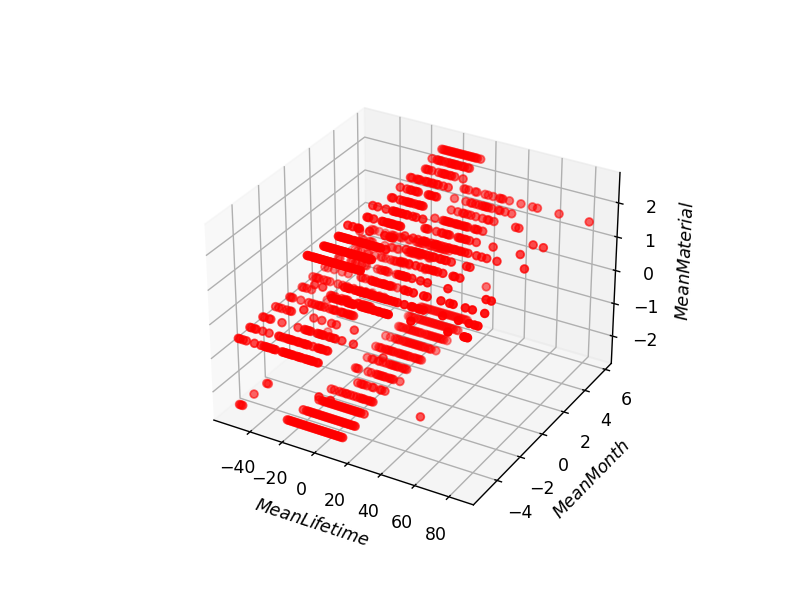

In [9]:
# display zero mean scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o')

ax.set_xlabel('$Mean Lifetime$')
ax.set_ylabel('$Mean Month$')
ax.set_zlabel('$Mean Material$')

plt.show()

In [10]:
# Use SVD to find first principal component

U,s,VT = np.linalg.svd(X_m,full_matrices=True)

# complete the next line of code to assign the first principal component to a
a = U[:,0]
print(s)
print(a)

[804.58367081 120.02622283  54.84894093]
[-0.9992884   0.01069685 -0.03617009]


<IPython.core.display.Javascript object>


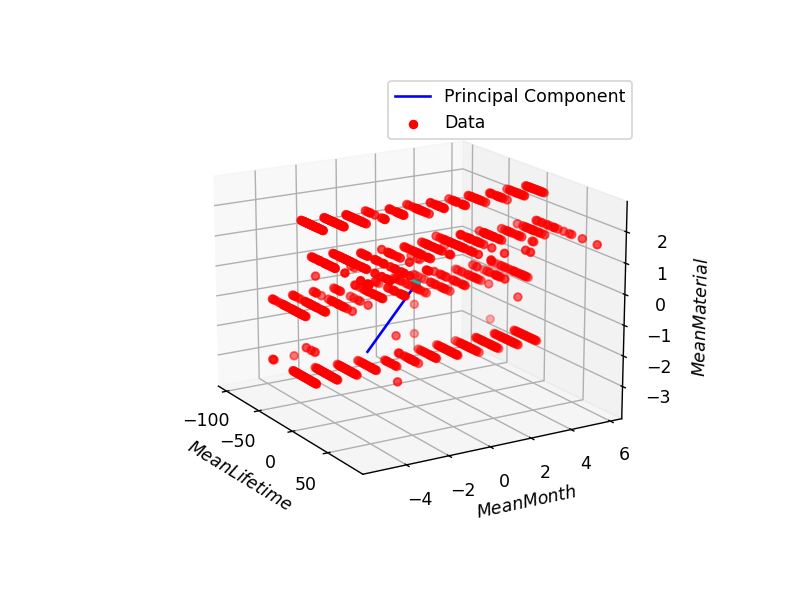

In [11]:
# display zero mean scatter plot and first principal component

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_m, y_m, z_m, c='r', marker='o', label='Data')

ax.scatter(a[0],a[1],a[2], c='c', marker='s')

ax.set_xlabel('$Mean Lifetime$')
ax.set_ylabel('$Mean Month$')
ax.set_zlabel('$Mean Material$')

ax.plot([0,100*a[0]],[0,100*a[1]],[0,100*a[2]], c='b',label='Principal Component')

ax.legend()
plt.show()

In [12]:
plt.savefig('pca.pdf',format='pdf')